# Lab 05: Decision Trees and Ensemble of Decision Trees
* Decision trees page 70
* Ensemble of decision trees page 83

Used for both classification and regression tasks.
    
Essentially they learn a hierarchy of if/else questions, leading to a decision. In the illustration below, each node represents a question or a terminal node (also called leaf) that contains the answer. The edges connect the answers to a
question with the next question you would ask. 

In the illustration below we build a model to distinguish between four classes of animals (hawks, penguins, dolphins, and bears) using the three features "has feathers", "can fly", and "has fins". Instead of building these models by hand, we can learn, we can learn them from data usiing supervised learning. 

* Root = first node
* Last nodes = decision/leaf

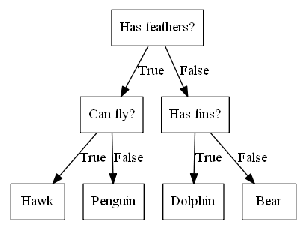

In [18]:
import mglearn
# ignore all deprecation warnings 
import warnings
warnings.filterwarnings('ignore')

# Decision Trees
mglearn.plots.plot_animal_tree()

In [19]:
# using the iris dataset, we can construct the tree as follows:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

# Visualizing decision trees with graphviz

<b>Run the following command in the anaconda prompt to install graphviz: conda install python-graphviz

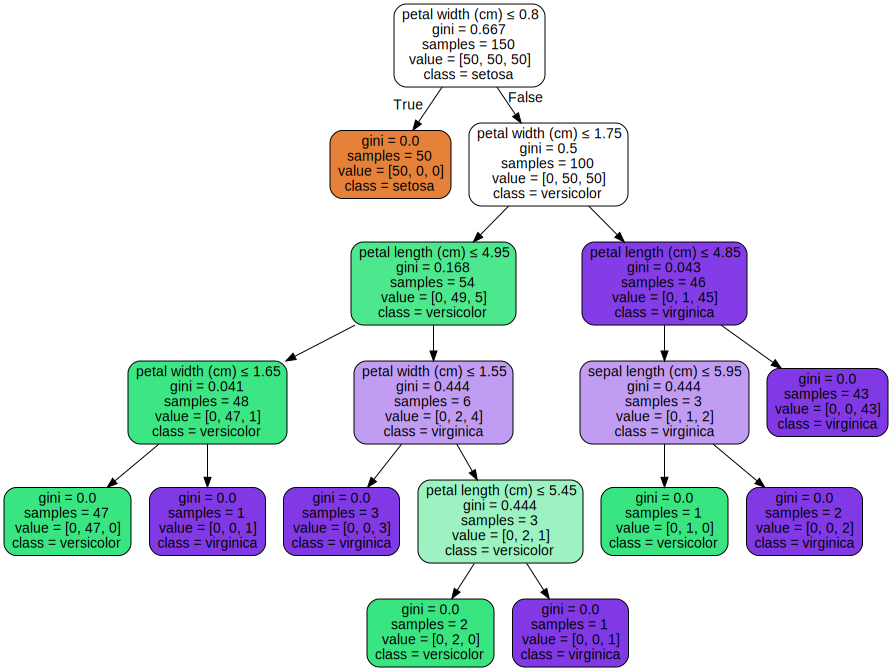

In [5]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Building decision trees on the two-moons dataset
To build a tree, the lgorithm searches over all possible tests and finds the one that is most informative about the target value. 

In the figure with depth=1, we split the dataset vertically at x[1]=0.0596, yields the most information; it best separates the points in class 1 from the points in class 2. The top node, also called the root, represents the whole dataset, consisting of 75 points belonging to class 0 and 75 points belonging to class 1. The split is done by testing wheter x[1] <= 0.0596, indicated by a black line.

Even though the first split did a good job of separating the two classes, the bottom region still contains points belonging to class 0, and the top region contains points belonging to class 1. We can build a more accurate model by repeating the process of looking for the best test in both regions.

A prediction on a new data point is made by checking which region of the partition of the feature space the point lies in, and then predicting the majority target (or the single target in the case of pure leaves) in that region. 

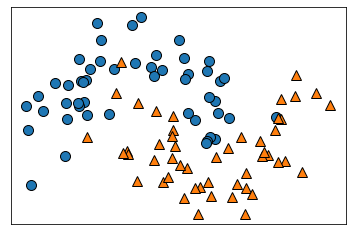

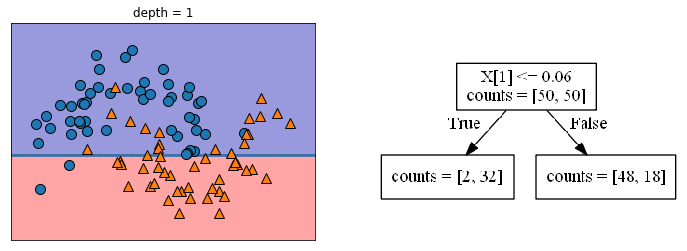

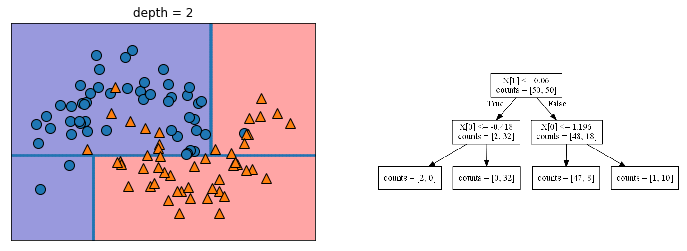

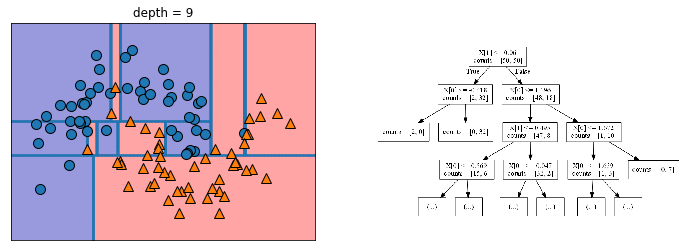

In [4]:
mglearn.plots.plot_tree_progressive()

## Controlling the complexity of Decision Trees

Building a tree as described above and continuing until all leaves are pure leads to models that are very complex and highly overfit to the training data. The presence of pure leaves means that a tree is 100% accurate on the training set. 

In the example below we have an accuracy of 100% on the training set - because the leaves are pure, the tree was grown deep enough that it could perfectly memorize all the labels on the training data. The accuracy is 93,7% on the test set. 

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


There are two common strategies to prevent overfitting: stopping the creation of the tree early (also called pre-prunning), or building the tree but then removing or collapsing nodes that contain little information (also called post-prunning or just prunning).

Possible ways to do pre-prunning is to limit the maximum depth of the tree, limiting the maximum number of leaves, or requiring a minumum number of points.

In the example below we stop building the tree after a certain depth has been reached. Here we set the max_depth=4, meaning only four consecutive questions can be asked. <b>Limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set. </b>

In [24]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [25]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

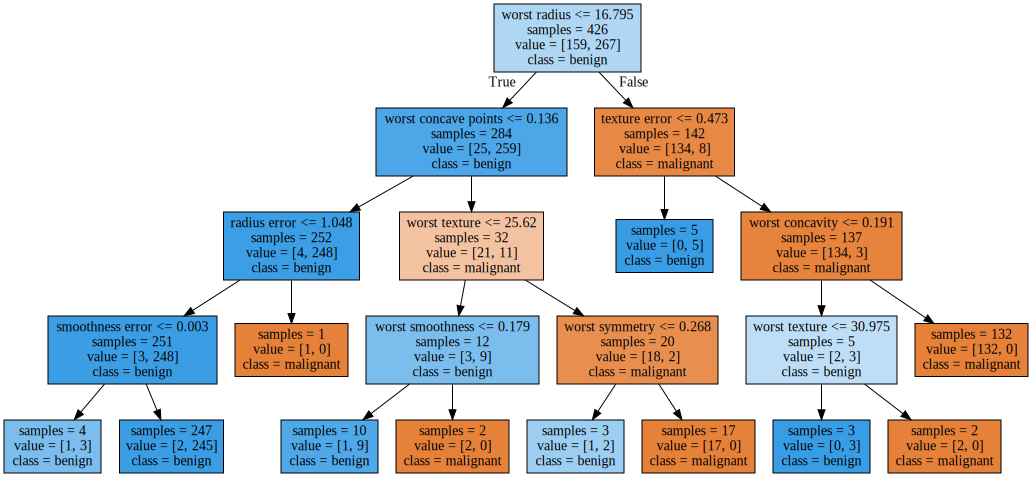

In [26]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## Feature importance in decision trees
Instead of looking at the whole tree, which can be taxing, there are some useful properties that we can derive to summarize the workings of the tree. The most commonly used summary is feature importance, which rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1:

In [27]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


Here we see that the feature used in the top split (“worst radius”) is by far the most important feature. This confirms our observation in analyzing the tree that the first level already separates the two classes fairly well.

However, if a feature has a low feature_importance, it doesn’t mean that this feature is uninformative. It only means that the feature was not picked by the tree, likely because another feature encodes the same information.

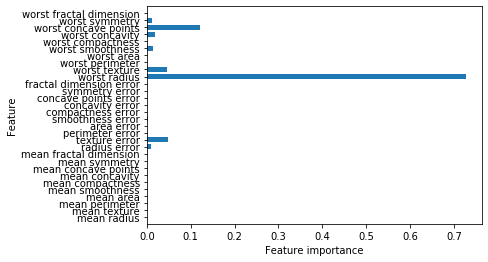

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


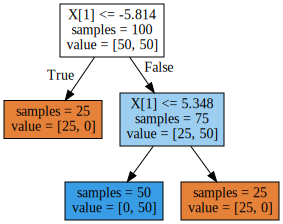

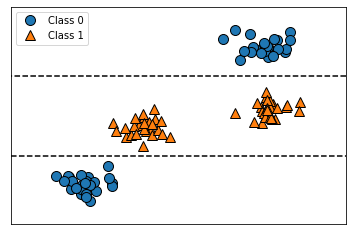

In [21]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

## Decision Tree Regressor


Text(0, 0.5, 'Price in $/Mbyte')

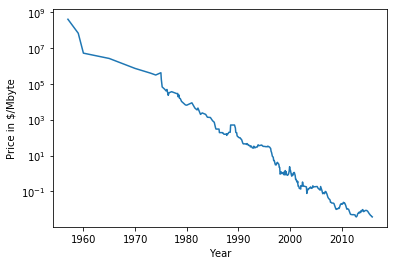

In [29]:
import os
import pandas as pd
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

## Comparing Decision Tree Prediction and Linear Prediction

The difference between the models is quite striking. <b>The linear model approximates the data with a line</b>, as we knew it would. This line provides quite a good forecast for the test data (the years after 2000), while glossing over some of the finer variations in both the training and the test data. <b>The tree model, on the other hand, makes perfect predictions on the training data</b>; we did not restrict the complexity of the tree, so it learned the whole dataset by heart. <b>However, once we leave the data range for which the model has data, the model simply keeps predicting the last known point. The tree has no ability to generate “new” responses, outside of what was seen in the training data.</b> This shortcoming applies to all models based on trees.


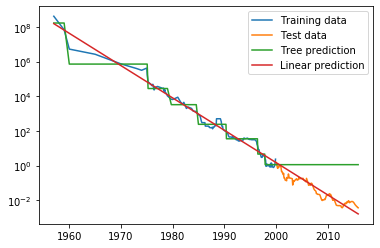

In [31]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

## Ensemble of Decision Trees
<b>Ensembles are methods that combine multiple machine learning models to create more powerful models.</b>
### Random forests
As we just observed, a main drawback of decision trees is that they tend to overfit the training data. <b>Random forests are one way to address this problem. A random forest is essentially a collection of decision trees, where each tree is slightly different from the others.</b> The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data. <b>If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results.</b>

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

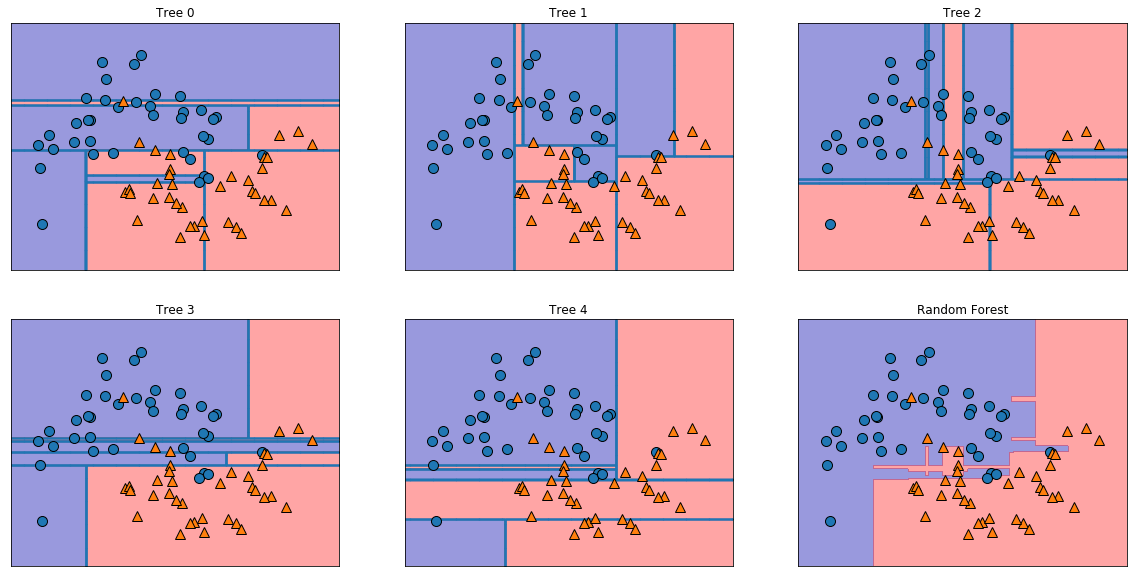

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


## Feature importance in decision trees
Below is a feature importances computed from a random forest that was fit to the Breast Cancer dataset. 

<b>As you can see, the random forest gives nonzero importance to many more features than the single tree. Similarly to the single decision tree, the random forest also gives a lot of importance to the “worst radius” feature, but it actually chooses “worst perimeter” to be the most informative feature overall.</b> The randomness in building the random forest forces the algorithm to consider many possible explanations, the result being that the random forest captures a much broader picture of the data than a single tree.

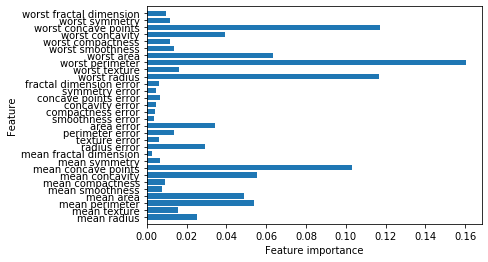

In [35]:
plot_feature_importances_cancer(forest)

## Gradient Boosted Regression Trees

<b>The gradient boosted regression tree is another ensemble method that combines multiple decision trees to create a more powerful model.</b> Despite the “regression” in the name, these models can be used for regression and classification. <b>In contrast to the random forest approach, gradient boosting works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one.</b>

In [32]:
### Gradient Boosted Regression Trees
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [33]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [34]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


## Feature importance gradient boosting classifier fit to the Breast cancer dataset

We can see that the feature importances of the gradient boosted trees are somewhat similar to the feature importances of the random forests, though the gradient boosting completely ignored some of the features.

As both gradient boosting and random forests perform well on similar kinds of data, a common approach is to first try random forests, which work quite robustly. If random forests work well but prediction time is at a premium, or it is important to squeeze out the last percentage of accuracy from the machine learning model, moving to gradient boosting often helps.


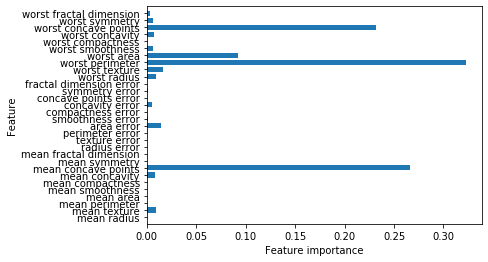

In [35]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

# Excercises

<b>Exercise 1:</b> Compare the feature importance of decision trees algorithm,  random forest and gradient boosted regression trees on breast cancer dataset 

<b>Exercise 2:</b> Download the bank dataset in "bank-full.csv" [from](https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip) and use Decision Tree and Random Forests in order to predict whether the customer will subscribe the term deposit or not. Use Decision Tree as baseline and compare the performance to Random Forest. Adjust the parameters of both decision trees and random forests as necessary.

Decision of the dataset is available [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)


## Decision Trees in scikit-learn
### https://scikit-learn.org/stable/modules/tree.html